# Macroeconomic Policy and the Optimal Destruction of Vampires

Based off the 1982 paper of the same title (https://www.journals.uchicago.edu/doi/pdfplus/10.1086/261080).

The paper investigate the diversion of resources into human welfare and capitalism driven needs, as opposed to spending resources on mitigating external factors on the human population. This papers looks at vampires, but this can be extended to other driving forces that reduce our population, such as fast-spreading diseases, or zombies

***




## Theory



### Human and Vampire Behavioural Patterns

Consider two distinct populations, humans and vampires, that are perpetually at war with each other. They have the following traits.

**Vampires**

1.   Will consume a fixed amount of blood per unit time
2.   Will die due to natural causes: burnt by sunlight
3.   A human bitten by a vampire turns into a vampire
4.   Can be killed by stakes through its heart

**Humans**

1.   Reproduces at a fixed rate
2.   Each human is a labour resource
    * Labour can be allocated to "widgets" for human well-being 
    * Labour can be allocated to "stakes" to kill one vampire each

**Implications**

The allocation of labor services between widgets and stakes is of critical importance in our model. A transfer of labor services from the widget sector to the stake sector reduces human welfare at present but may raise welfare in the future (since an increase in stake production reduces the vampire population and thereby increases the future labor force whereby future widgets may be produced). Thus, humans face an intertemporal welfare trade-off. 

### Rate Equations

The vampire population will be dubbed $V$, while the human population is given by $L$. 

**Human Population**

Humans are taken to reproduce at rate $n$ per unit time, and the vampire blood intake rate is given (in human capacity units, $5$L) as $\rho$. Hence, the change in human population per unit time is

$$
\frac{\mathrm{d}L}{\mathrm{d}t} = nL - \rho V
$$

**Vampire Population**

Let $S$ be the quantity of stakes produced. The attrition of vampire death due to natural sunlight is given as a proportional constant of the vampire population $\sigma$. Hence, the change in the vampire population is given by

$$
\frac{\mathrm{d}V}{\mathrm{d}t} = \rho V - \sigma V - S
$$

**Labour Allocation**

The human labour resource can be allocated into either production of widgets $W$ for human well being, or stakes $S$, to extinguish vampires. We can write the production of these two products by coefficients $a,b$:

$$
aW + bS = L
$$

**Goal**

The goal of the human population is to maximise its own welfare. This welfare can be defined by the consumption of widgets per person, or

$$
w = \frac{W}{L}
$$

By summing up the welfare over the time of the simulation, we can track how the welfare of humans change over time.

***

## Python Numerical Methods

This section brings a quick review/primer into python numerical methods.

The solve these equations, we will have to take a small step in time, find the new populations, then use these to find the population at the next step in time.

Consider the population of humans. At the first instant in time $t_0$, it has the value $L$. At the next instant in time $t+\mathrm{d}t$, it has the value

$$
L + \mathrm{d}L
$$

The small change in population size is given earlier, and so we can define the step in time as something small, $\mathrm{d}t=0.001$s, and then find $\mathrm{d}L$ by

$$
\mathrm{d}L = ( nL - \rho V )\cdot \mathrm{d}t = ( nL - \rho V )\cdot 0.001
$$

By repeating this many many times, we can trace the changes in population.
***

# Simulation

## Importing Libraries

First, we have to import the required libraries for this simulation. We will need *numpy* for math, and *matplotlib.pyplot* for plotting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Variables

Next, we have to define the variables we want to hold constant. For starters, we define our time step, and the total run time of the simulation. The units will be per year.

In [ ]:
dt = 0.001
runtime = 1000

We also define reproduction rates of humans $n$, the feeding rate of vampires $\rho$, and the death-by-sunlight rate of vampires $\sigma$.

In the United States, humans reproduce at $n = 1.64$ per year.

Assuming vampires consume the same proportion of blood as bats, they take in half their body weight of blood in a single feeding, and can subsist without blood for two nights. Hence, we set $\rho = 365 $days $/\ 3$ days $\times\ 1/2$ $=365/6$

Assuming that vampires know that sunlight is severely detrimental to their well being, we can assume that vampires that die to sunlight are committing suicide. The global suicide rates are ~$12$ in $100,000$. Hence, we set $\sigma = 0.00012$.

In [ ]:
n       = 1.64
rho     = 365/6
sigma   = 12/1E5

We also want to define lists to keep track of the change in populations over time. After updating the populations, we will add it to the end of the list, to keep them for plotting later. We also initialise a list to hold the time.

Note that we are starting with a population size of $L=1000$ for a small human village, and $V=5$ for vampires hiding out in some cove. 

In [ ]:
vampire_popln   = [5]
human_popln     = [1000]

time            = [0]

Note that if we ignore the labour division, this reduces to the standard predator-prey model, governed by the Lotka-Volterra equations.
***

The labour division is governed by variables $a$ and $b$. These need not remain constant over time, but we will keep them so for simplicity.

We will need a function to find the stakes and widgets produced as the values are changing as the population changes. This function will take in the current value of the human population (float value) and return two values, the stakes $S$ and widgets $W$ produced (float values).

We will also make a list to keep track of the welfare of the population $w$.

In [ ]:
# Widget and Stakes productions
W, S = 0, 0         # Initialised at zero arbitrarily
b = .29749          # Can be modified
a = 1 - b

w = [0]

def labour_division(L):  # Takes in the labour force, and outputs stakes and widgets

    # Computing the stakes and widgets produced
    W = a*L
    S = b*L

    # Updating the list
    w.append(w[-1] + W/L)

    return S, W

# Running the simulation

We will be using a while-loop to run the simulation, which terminates when the current run time exceeds the total allowed run time (Defined earlier).

At every step in time, we will increment the current time, as well as update the populations for the humans and vampires. We also include the limit when either populations die off.

In [ ]:
while time[-1] < runtime and (vampire_popln[-1] > 0 and human_popln[-1] > 0):
    current_time = time[-1]
    current_time += dt                  # Increment the current time

    V = vampire_popln[-1]               # Obtain the current vampire population
    L = human_popln[-1]                 # Obtain the current human population

                                        # Now to find the current labour allocation
    S, W = labour_division(L)

    dL = ( n*L - rho*V ) * dt           # Change in human population per unit time
    dV = ( rho*V - sigma*V - S ) * dt   # Change in vampire population per unit time

                                        # Update the populations
    new_V = V + dV
    new_L = L + dL

                                        # Add the updated populations back into the list
    vampire_popln.append(new_V)
    human_popln.append(new_L)
    time.append(current_time)

## Plotting the Results

We can plot the change in populations over time. 

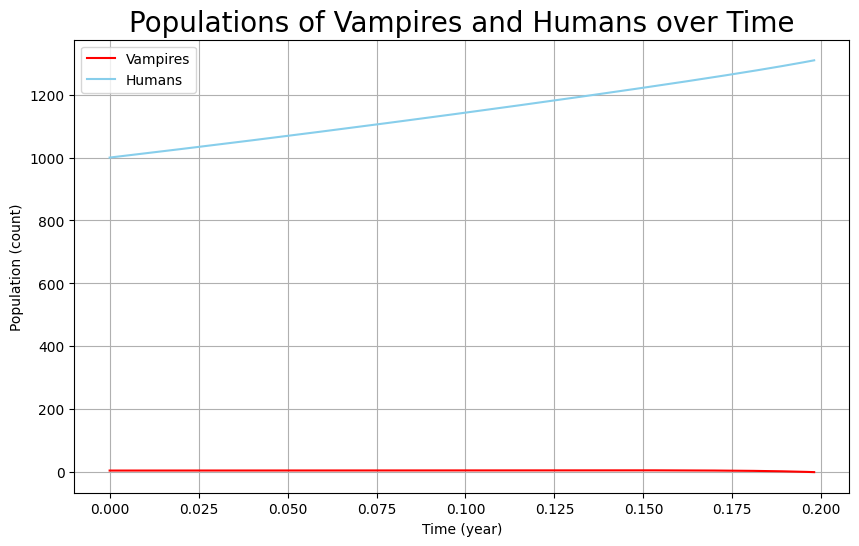

In [ ]:
# Changing the figure size
plt.figure(figsize = (10,6), dpi = 100)

# Plotting the two line graphs
plt.plot(time,vampire_popln, c = 'r', label = "Vampires")
plt.plot(time,human_popln, c = 'skyblue', label = 'Humans')

# Changing the axis labels and the title
plt.title("Populations of Vampires and Humans over Time", fontsize = 20)
plt.ylabel("Population (count)")
plt.xlabel("Time (year)")

# Adding the background grid and legend
plt.grid()
plt.legend()

# Showing the plot
plt.show()

We can also consider the change in population welfare over time.

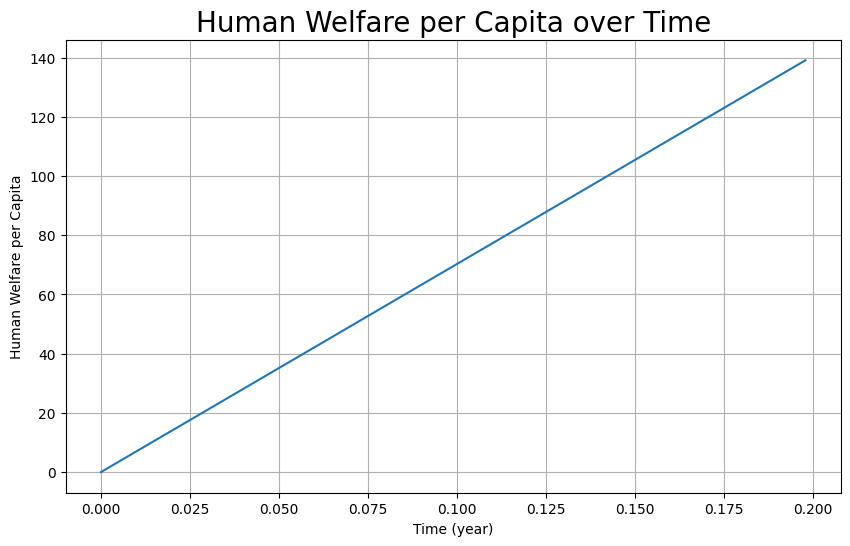

In [ ]:
# Changing the figure size
plt.figure(figsize = (10,6), dpi = 100)

# Plotting the line graph
plt.plot(time, w)

# Changing the axis labels and the title
plt.title("Human Welfare per Capita over Time", fontsize = 20)
plt.ylabel("Human Welfare per Capita")
plt.xlabel("Time (year)")

# Adding the background grid
plt.grid()

# Showing the plot
plt.show()

## Results

If initialised without the contribution from stakes, we find that the human population quickly goes extinct, and the welfare peaks at 1.

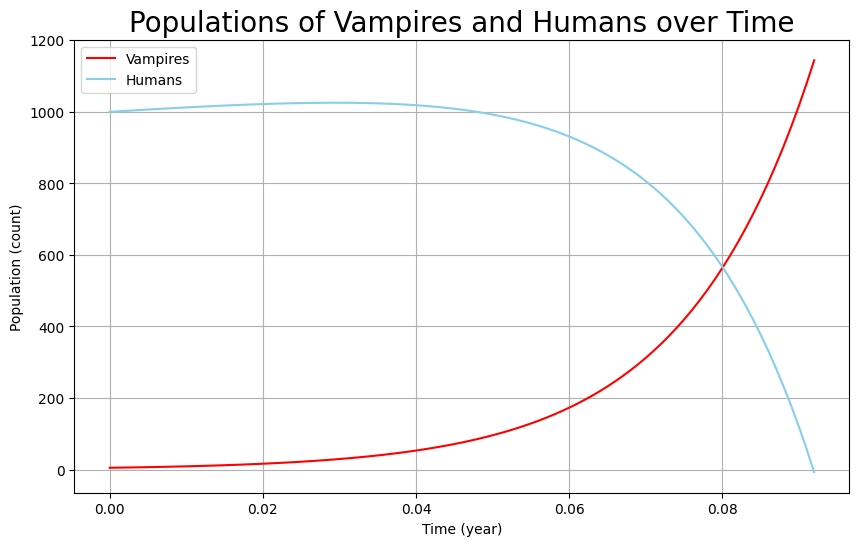

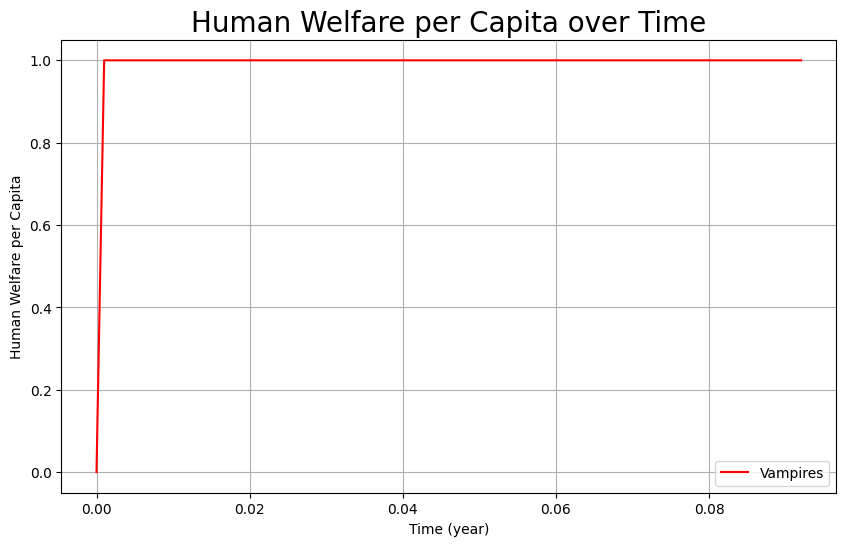

## Discussion

What are the assumptions made in the model? What are the possible extensions to the model?

**Suggestions**

* The labour division should optimally change with size of the vampiric population. You can try using a  linear or quadratic relation.


* Consider a vampire population that moderates their feeding rate to optimise their welfare. Will a steady-state equilibrium be achieved?
* Other objects that humans make have a detrimental effect on vampires, e.g., crosses, rosary beads, etc. What are their impacts on the vampire-human relations?